In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-ops-vols-devs-hack-1/sample_submission.csv
/kaggle/input/ml-ops-vols-devs-hack-1/train.csv
/kaggle/input/ml-ops-vols-devs-hack-1/test.csv


In [5]:
df_train = pd.read_csv('/kaggle/input/ml-ops-vols-devs-hack-1/train.csv')
df_train

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2014-08-18,MountGambier,6.0,13.5,0.0,1.4,1.9,S,30.0,SSE,...,69.0,57.0,1024.4,1023.0,7.0,6.0,9.7,12.5,No,No
1,2016-10-19,Watsonia,4.4,16.4,3.6,3.6,10.4,W,24.0,WNW,...,71.0,52.0,1020.2,1020.0,1.0,5.0,9.9,15.4,Yes,No
2,2013-08-07,Perth,17.1,21.9,4.6,1.6,3.0,NW,52.0,N,...,85.0,70.0,1013.8,1010.4,4.0,7.0,18.8,21.7,Yes,Yes
3,2010-11-07,Wollongong,12.9,20.8,0.0,NaN,NaN,NE,43.0,ENE,...,74.0,70.0,1021.2,1017.7,NaN,NaN,18.0,19.9,No,Yes
4,2014-12-28,Adelaide,13.3,30.4,0.0,NaN,NaN,W,30.0,NNW,...,39.0,23.0,1015.3,1010.3,NaN,NaN,21.5,29.3,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116363,2010-11-28,Nuriootpa,10.2,18.5,3.0,4.4,6.2,SSW,48.0,SSW,...,75.0,40.0,1019.3,1018.8,8.0,6.0,12.7,16.8,Yes,No
116364,2012-11-04,Townsville,24.5,30.5,0.0,10.6,10.9,ENE,39.0,ENE,...,56.0,55.0,1015.1,1011.9,2.0,2.0,28.7,29.0,No,Yes
116365,2016-06-15,Mildura,3.3,18.8,0.0,3.0,8.5,NNE,28.0,ENE,...,85.0,48.0,1032.3,1027.7,2.0,2.0,8.3,18.2,No,Yes
116366,2009-11-09,Canberra,NaN,31.7,0.0,7.6,NaN,NaN,NaN,NaN,...,NaN,16.0,NaN,NaN,NaN,NaN,NaN,30.9,No,No


In [6]:
df_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,115853.000000,116112.000000,115173.000000,66498.000000,60800.000000,108746.000000,115258.000000,114193.000000,114903.000000,113391.000000,104858.000000,104891.000000,72572.000000,69756.000000,115610.000000,114104.00000
mean,12.217997,23.159362,2.488305,5.450544,7.518002,40.160383,14.033325,18.689140,69.153477,52.072572,1017.539227,1015.152054,4.491291,4.568123,16.977742,21.60669
std,6.408990,7.120924,8.793658,4.175225,3.813882,13.697858,8.894625,8.846438,19.050740,20.984941,7.135135,7.063776,2.884715,2.720295,6.495953,6.94111
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.700000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.300000,1.000000,2.000000,12.300000,16.50000
50%,12.000000,22.600000,0.000000,4.600000,8.300000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.700000,21.00000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.600000,26.30000
max,31.400000,48.100000,371.000000,145.000000,14.300000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.20000


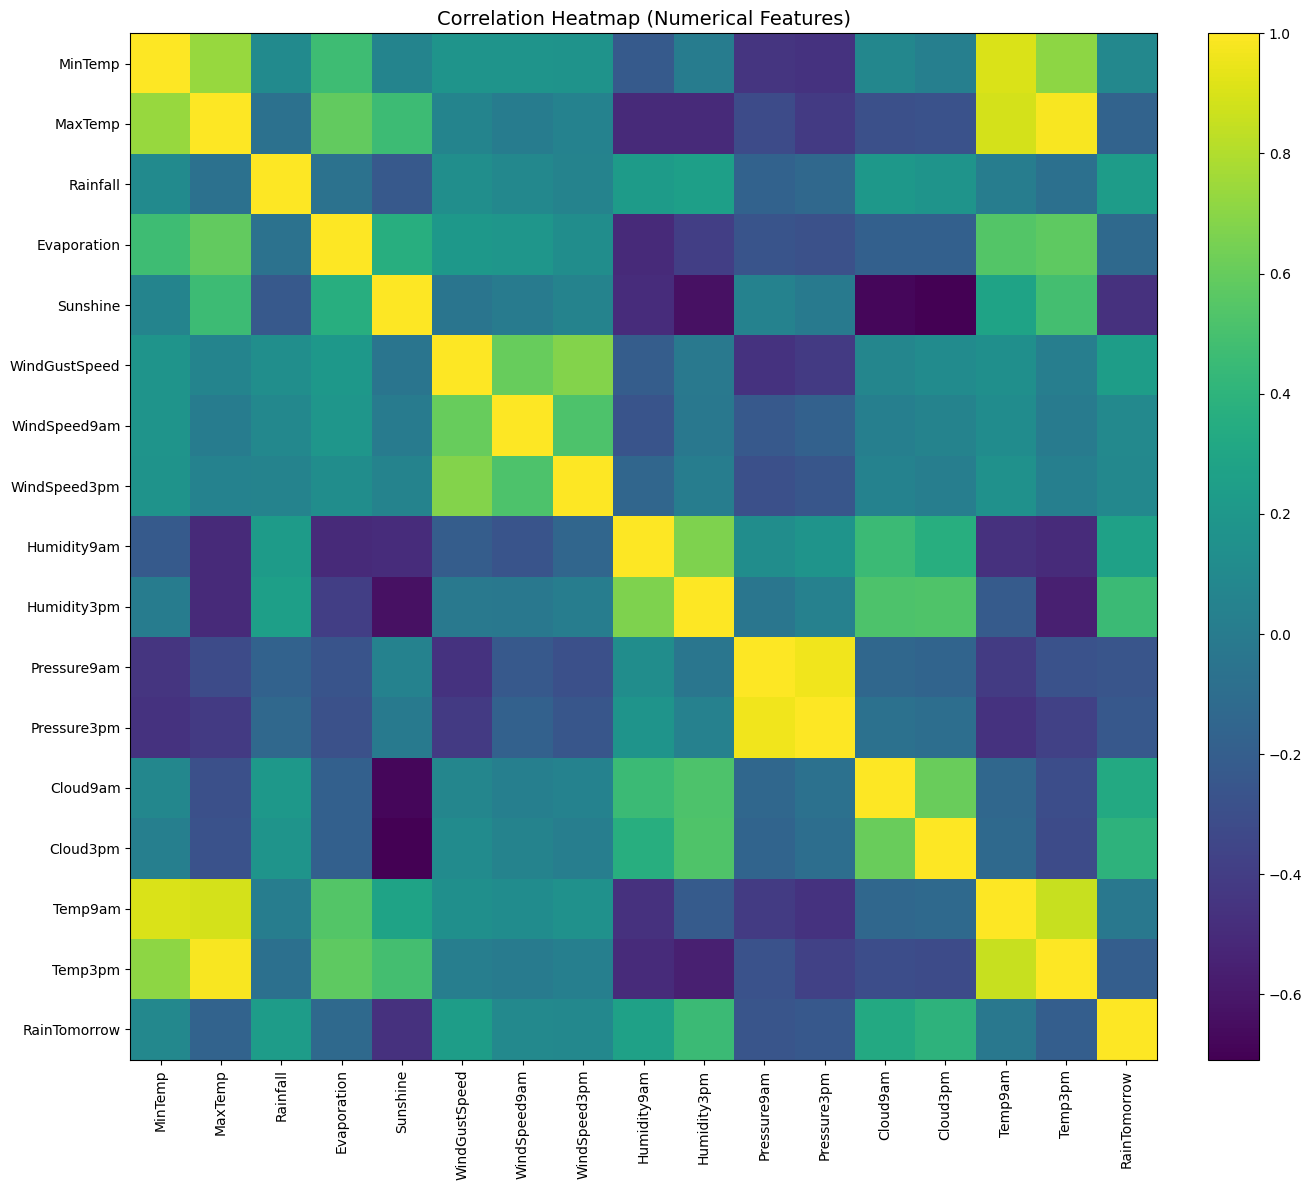

In [7]:
import matplotlib.pyplot as plt


# 2. Convert target to numeric (important!)
df_train["RainTomorrow"] = df_train["RainTomorrow"].map({"Yes": 1, "No": 0})

# 3. Select only numerical columns
num_df = df_train.select_dtypes(include=[np.number])

# 4. Compute correlation matrix
corr = num_df.corr()

# 5. Plot heatmap
plt.figure(figsize=(14, 12))
im = plt.imshow(corr)

# Color bar
plt.colorbar(im, fraction=0.046, pad=0.04)

# Axis labels
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Heatmap (Numerical Features)", fontsize=14)
plt.tight_layout()
plt.show()


In [3]:
df_test = pd.read_csv('/kaggle/input/ml-ops-vols-devs-hack-1/test.csv')
df_test

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,id
0,2009-03-26,Perth,15.9,31.3,0.0,7.2,10.7,E,31.0,E,...,63.0,33.0,1021.7,1018.5,3.0,1.0,18.8,30.4,No,0
1,2016-03-21,Hobart,10.2,18.3,0.0,2.6,7.6,ESE,30.0,N,...,65.0,58.0,1024.5,1022.9,7.0,3.0,13.5,16.9,No,1
2,2014-06-18,AliceSprings,-1.0,20.9,0.0,3.8,NaN,E,30.0,WNW,...,59.0,24.0,1025.8,1020.6,0.0,1.0,8.1,20.2,No,2
3,2016-10-18,SalmonGums,-0.3,20.7,0.0,NaN,NaN,SSE,28.0,ESE,...,53.0,28.0,NaN,NaN,NaN,NaN,14.0,19.9,No,3
4,2008-10-14,Perth,12.2,29.5,0.0,6.0,11.5,NNE,28.0,E,...,46.0,25.0,1023.3,1018.6,0.0,1.0,19.2,28.9,No,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29087,2009-06-30,PerthAirport,9.1,15.1,8.8,2.8,3.4,W,56.0,WSW,...,80.0,68.0,1010.5,1012.7,7.0,7.0,13.1,13.9,Yes,29087
29088,2011-09-21,Walpole,11.4,17.2,7.4,NaN,NaN,SSW,63.0,NW,...,90.0,76.0,1008.4,1008.0,NaN,NaN,11.9,14.7,Yes,29088
29089,2017-02-10,Darwin,23.4,29.1,72.8,NaN,0.2,WSW,33.0,SW,...,86.0,87.0,1006.9,1005.0,8.0,7.0,24.9,26.3,Yes,29089
29090,2015-12-23,Darwin,24.1,30.9,49.4,6.0,2.1,WSW,67.0,W,...,84.0,78.0,1005.0,1000.7,8.0,7.0,27.4,28.2,Yes,29090


Cleaning up the data, removing null/NaN values, removing outliers

In [4]:
df_train.isnull().sum()

Date                 0
Location             0
MinTemp            515
MaxTemp            256
Rainfall          1195
Evaporation      49870
Sunshine         55568
WindGustDir       7671
WindGustSpeed     7622
WindDir9am        8214
WindDir3pm        3148
WindSpeed9am      1110
WindSpeed3pm      2175
Humidity9am       1465
Humidity3pm       2977
Pressure9am      11510
Pressure3pm      11477
Cloud9am         43796
Cloud3pm         46612
Temp9am            758
Temp3pm           2264
RainToday         1195
RainTomorrow         0
dtype: int64

In [5]:
# Fills nulls in all numeric columns with their respective medians
#df_train.fillna(df_train.select_dtypes(include=['number']).median(), inplace=True)

df_train.isnull().sum()

Date                 0
Location             0
MinTemp            515
MaxTemp            256
Rainfall          1195
Evaporation      49870
Sunshine         55568
WindGustDir       7671
WindGustSpeed     7622
WindDir9am        8214
WindDir3pm        3148
WindSpeed9am      1110
WindSpeed3pm      2175
Humidity9am       1465
Humidity3pm       2977
Pressure9am      11510
Pressure3pm      11477
Cloud9am         43796
Cloud3pm         46612
Temp9am            758
Temp3pm           2264
RainToday         1195
RainTomorrow         0
dtype: int64

In [6]:
# Fills nulls in all numeric columns with their respective medians
#df_test.fillna(df_test.select_dtypes(include=['number']).median(), inplace=True)

df_test.isnull().sum()

Date                 0
Location             0
MinTemp             97
MaxTemp             40
Rainfall           222
Evaporation      12120
Sunshine         12573
WindGustDir        394
WindGustSpeed      360
WindDir9am        1301
WindDir3pm         249
WindSpeed9am        77
WindSpeed3pm        93
Humidity9am        133
Humidity3pm        868
Pressure9am       3825
Pressure3pm       3827
Cloud9am         11412
Cloud3pm         11973
Temp9am             64
Temp3pm            745
RainToday          222
id                   0
dtype: int64

Applying one-hot encoding for WindGustDir and WindDir9am

In [8]:
df_train["Date"] = pd.to_datetime(df_train["Date"])



In [9]:
df_test["Date"] = pd.to_datetime(df_test["Date"])



In [10]:

season_map = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}

df_train['Season'] = df_train['Date'].dt.month.map(season_map)
df_test['Season'] = df_test['Date'].dt.month.map(season_map)


In [12]:
df_train.drop(columns=['Date'], inplace=True)

In [13]:
df_test.drop(columns=['Date'], inplace=True)

In [14]:

df_train = pd.get_dummies(
    df_train,
    columns=['Location', 'WindDir3pm', 'RainToday', 'WindGustDir', 'WindDir9am', 'Season'],
    drop_first=True,
    dtype=int
)


In [15]:

df_test = pd.get_dummies(
    df_test,
    columns=['Location', 'WindDir3pm', 'RainToday', 'WindGustDir', 'WindDir9am', 'Season'],
    drop_first=True,
    dtype=int
)


In [16]:
df_train['RainTomorrow'] = df_train['RainTomorrow'].map({'No': 0, 'Yes': 1})


In [47]:
df_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,15.9,31.3,0.0,7.2,10.7,31.0,15.0,11.0,63.0,33.0,...,0,0,0,0,0,0,0,0,0,0
1,10.2,18.3,0.0,2.6,7.6,30.0,6.0,20.0,65.0,58.0,...,0,0,0,0,0,0,0,0,0,0
2,-1.0,20.9,0.0,3.8,7.5,30.0,6.0,9.0,59.0,24.0,...,0,0,0,0,0,0,0,0,1,0
3,-0.3,20.7,0.0,5.0,7.5,28.0,7.0,9.0,53.0,28.0,...,0,0,0,0,0,0,0,0,0,0
4,12.2,29.5,0.0,6.0,11.5,28.0,11.0,9.0,46.0,25.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29087,9.1,15.1,8.8,2.8,3.4,56.0,24.0,19.0,80.0,68.0,...,0,0,0,0,0,0,0,0,0,1
29088,11.4,17.2,7.4,5.0,7.5,63.0,28.0,22.0,90.0,76.0,...,0,1,0,0,0,0,0,0,0,0
29089,23.4,29.1,72.8,5.0,0.2,33.0,9.0,20.0,86.0,87.0,...,0,0,0,0,0,0,1,0,0,0
29090,24.1,30.9,49.4,6.0,2.1,67.0,17.0,22.0,84.0,78.0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
y_train = df_train['RainTomorrow']
X_train = df_train.drop('RainTomorrow', axis=1)



In [23]:

import lightgbm as lgb

scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])

lgbm = lgb.LGBMClassifier(
    # Core
    objective="binary",
    boosting_type="gbdt",
    random_state=42,

    # Learning
    learning_rate=0.03,
    n_estimators=5000,         

    # Tree structure (bias–variance balance)
    num_leaves=63,
    max_depth=8,
    min_data_in_leaf=50,

    # Sampling (regularisation)
    subsample=0.75,
    subsample_freq=1,
    colsample_bytree=0.75,

    # Regularization
    lambda_l1=0.1,
    lambda_l2=1.0,

    # Imbalance handling (prefer this over class_weight)
    scale_pos_weight=scale_pos_weight,       

    # Speed / stability
    n_jobs=-1,
    verbosity=-1
)

lgbm.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.75, lambda_l1=0.1, lambda_l2=1.0,
               learning_rate=0.05, max_depth=8, min_data_in_leaf=50,
               n_estimators=10000, n_jobs=-1, num_leaves=63, objective='binary',
               random_state=42, scale_pos_weight=3.0, subsample=0.75,
               subsample_freq=1, verbosity=-1)

In [24]:
X_test = df_test.drop(columns=["id"])


In [28]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [30]:
y_pred = lgbm.predict(X_test)



In [31]:


# Load data
sample_sub = pd.read_csv("/kaggle/input/ml-ops-vols-devs-hack-1/sample_submission.csv")


# Create submission
submission = sample_sub.copy()
submission["RainTomorrow"] = y_pred

#Map to yes and no
submission["RainTomorrow"] = submission["RainTomorrow"].map(
    {1: "Yes", 0: "No"}
)


# Save
submission.to_csv("submission.csv", index=False)

import os
print(os.listdir())  # MUST show 'submission.csv'
assert "submission.csv" in os.listdir()

print("submission.csv correctly created in notebook root")




['.virtual_documents', 'submission.csv']
submission.csv correctly created in notebook root
